## tasks:
1. Identify how the energy landscape of flory-huggins change with Taylor series expansion of log 
2. Identify how the energy landscape changes with higher polymerization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import seaborn as sns
palette = sns.color_palette(n_colors=10)
sns.set_palette(palette)
import matplotlib.pyplot as plt

import pdb
import numpy as np

import sys
if '../' not in sys.path:
    sys.path.append('../')

from solvers.utils import makegrid2d


import warnings
warnings.filterwarnings("ignore")

from plotly.subplots import make_subplots
import plotly.graph_objects as go


Bad key "text.kerning_factor" on line 4 in
/projects/academic/olgawodo/kiranvad/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
grid = np.asarray(makegrid2d(num=100))

In [4]:
M = np.array([1,1])
chisp = 3
CHI = np.array([[0,chisp],[chisp,0]])
M,CHI

(array([1, 1]), array([[0, 3],
        [3, 0]]))

# Test Effect of increasing number of Taylor Series terms

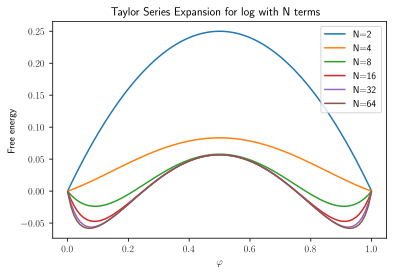

In [5]:
from solvers import helpers
num_terms = [2,4,8,16,32,64]
fig,axs = plt.subplots()
for n in num_terms:
    E = []
    for point in grid:
        E.append(helpers.FHTaylor(point, M, CHI,beta=0.0,n=n))
    axs.plot(np.asarray(grid)[:,0],E,label='N={}'.format(n))
axs.legend()
axs.set(xlabel=r'$\varphi$', ylabel='Free energy',
       title='Taylor Series Expansion for log with N terms')
#plt.savefig('../figures/MeetingMay6Wed/'+'taylor_series.png',dpi=500,bbox_inches='tight')
plt.show()

## Test effect of M on free energy

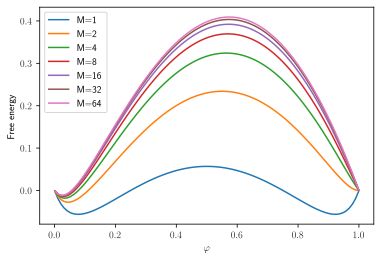

In [15]:
degree = [1,2,4,8,16,32,64]
fig,axs = plt.subplots()
for m in degree:
    E = []
    for point in grid:
        M = np.array([1,m])
        chisp = 3
        CHI = np.array([[0,chisp],[chisp,0]])
        E.append(helpers.FHTaylor(point, M, CHI,beta=0.0,n=32))
        #E.append(helpers.flory_huggins(point, M, CHI,beta=0.0))
    axs.plot(np.asarray(grid)[:,0],E,label='M={}'.format(m))
axs.legend()
axs.set(xlabel=r'$\varphi$', ylabel='Free energy')
#plt.savefig('../figures/MeetingMay6Wed/'+'degree_nplog_with_beta1em4.png',dpi=500,bbox_inches='tight')
plt.show()

## Plot $$F_{\beta} - F_{\beta=0} \text{vs} \phi \quad $$

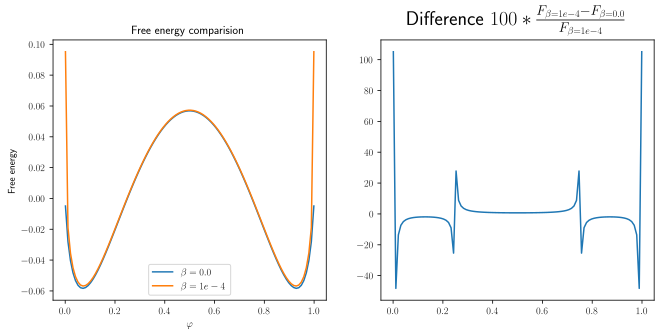

In [20]:
M = np.array([1,1])
chisp = 3
CHI = np.array([[0,chisp],[chisp,0]])

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10.8,4.8))
F_beta, F_nobeta = [],[]
for point in grid:
    F_nobeta.append(helpers.flory_huggins(point, M, CHI,beta=0.0))
    F_beta.append(helpers.flory_huggins(point, M, CHI,beta=1e-4))
axs[0].plot(np.asarray(grid)[:,0],F_nobeta,label=r'$\beta=0.0$')
axs[0].plot(np.asarray(grid)[:,0],F_beta,label=r'$\beta=1e-4$')
axs[0].legend()
axs[0].set(xlabel=r'$\varphi$', ylabel='Free energy',
       title='Free energy comparision')
#plt.savefig('../figures/MeetingMay6Wed/'+'taylor_series.png',dpi=500,bbox_inches='tight')
r = 100*((np.asarray(F_beta)-np.asarray(F_nobeta))/np.asarray(F_beta)+1e-6)
axs[1].plot(np.asarray(grid)[:,0],r)
axs[1].set_title(r'Difference $100*\frac{F_{\beta=1e-4}-F_{\beta=0.0}}{F_{\beta=1e-4}}$',fontsize=20)
plt.show() 